# Метрические алгоритмы и SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import datasets

[[11.34890037 -2.27926257]
 [10.81594165 -2.2615425 ]
 [-5.51014016 -4.87242462]
 ...
 [ 9.80298627 -0.08371576]
 [ 0.7515745   9.18597504]
 [-4.04313809 -5.12129949]]
[1 1 0 ... 1 2 0]
0
[-5.51014016 -5.40992988 -6.0639342  ... -6.33353499 -6.48431028
 -4.04313809]
1
[11.34890037 10.81594165  9.57745505 ...  8.6691271  10.23225494
  9.80298627]
2
[ 1.46084477 -0.75245306  0.85336242 ... -0.75334942  0.8772029
  0.7515745 ]


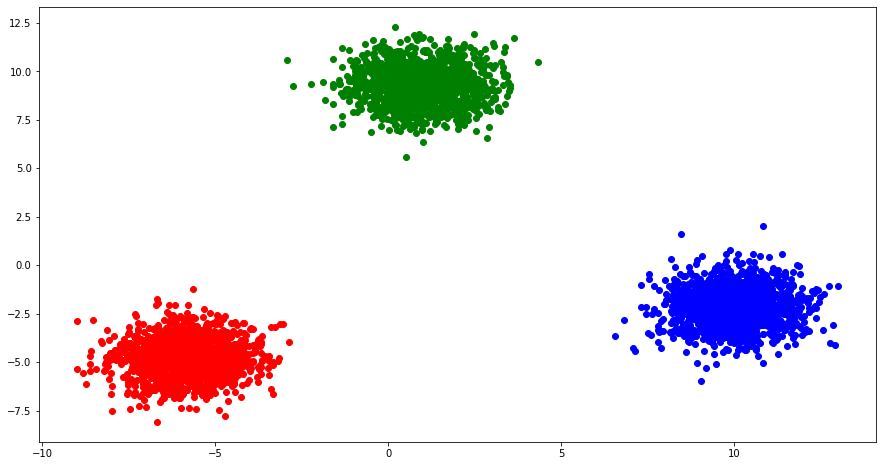

In [6]:
n_samples = 4096

X, y = datasets.make_blobs(n_samples=n_samples, centers=3, n_features=2)

print(X)
print(y)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colors = {0:'red', 1:'blue', 2:'green'}

for key, value in colors.items():
    # print(colors.items())
    print(key)
    print(X[y==key, 0])   
    ax.scatter(X[y==key, 0], X[y==key, 1], c=value, label=key)

plt.axis('tight')

plt.show()

# Nearest Centroid

class sklearn.neighbors.NearestCentroid(metric='euclidean', *, shrink_threshold=None)

In [4]:
from sklearn.neighbors import NearestCentroid

In [21]:
model = NearestCentroid()
model.fit(X, y)

print(model.get_params())

print(model.centroids_)

{'metric': 'euclidean', 'shrink_threshold': None}
[[ 8.10586569 -6.67522624]
 [ 4.64079777 -8.43472215]
 [-4.70282034 -7.51190889]]


In [22]:
print(model.predict([[-0.8, -1]]))

[2]


<ipython-input-23-8a9ed7b91c75>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


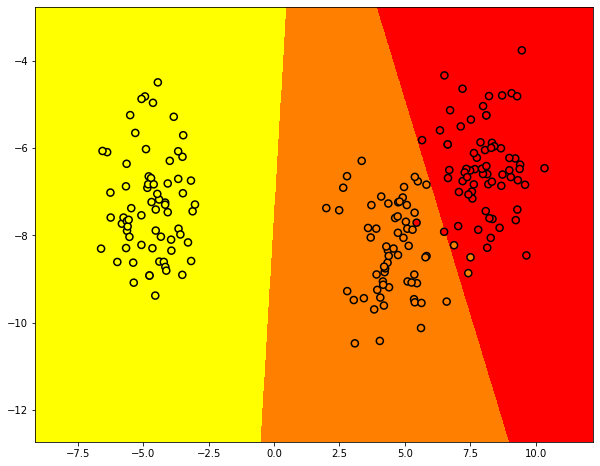

In [23]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)


# KNN

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

#### weights{‘uniform’, ‘distance’} or callable, default=’uniform’

Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.



#### algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

Note: fitting on sparse input will override the setting of this parameter, using brute force.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = NearestCentroid()
model.fit(X, y)

print(model.get_params())

print(model.centroids_)

{'metric': 'euclidean', 'shrink_threshold': None}
[[ 8.10586569 -6.67522624]
 [ 4.64079777 -8.43472215]
 [-4.70282034 -7.51190889]]


In [25]:
print(model.predict([[-0.8, -1]]))

[2]


<ipython-input-26-8a9ed7b91c75>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


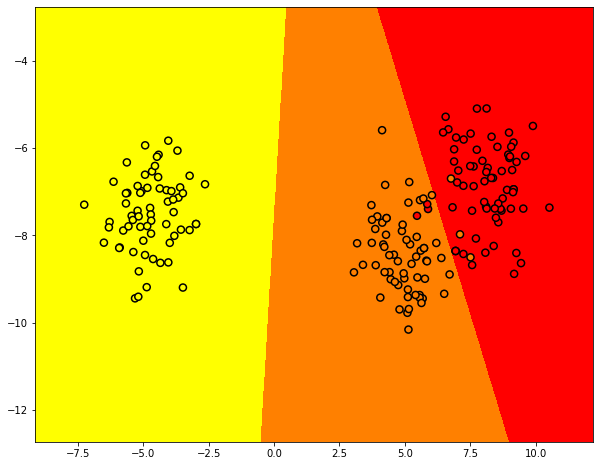

In [26]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)


# SVM

In [27]:
from sklearn.svm import SVC

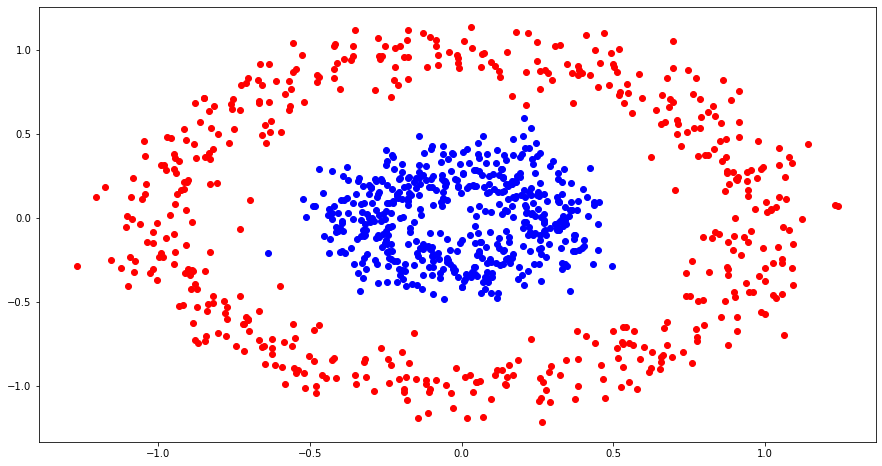

In [28]:
n_samples = 1000

X, y = datasets.make_circles(n_samples=n_samples, noise=0.1, factor=0.3)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colors = {0:'red', 1:'blue'}
for key, value in colors.items():   
    ax.scatter(X[y==key, 0], X[y==key, 1], c=value, label=key)
plt.axis('tight')

plt.show()

<ipython-input-29-ee7243ecd9aa>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


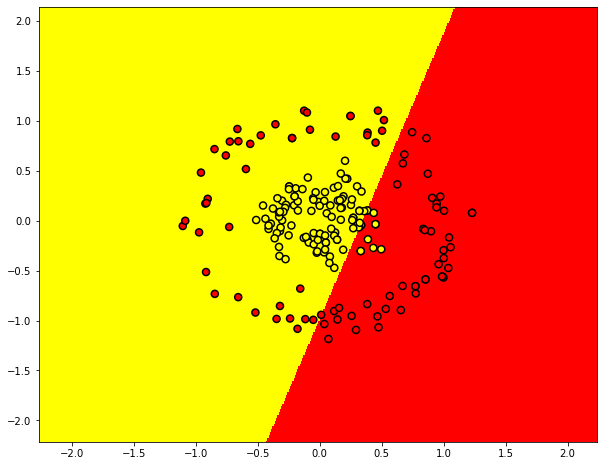

In [29]:
model = SVC(kernel='linear')
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)


<ipython-input-30-412d8c35480b>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


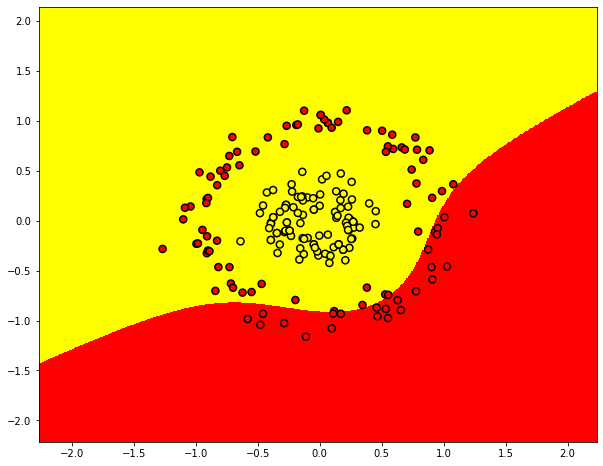

In [30]:
model = SVC(kernel='poly')
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)


<ipython-input-31-7ab51798840f>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


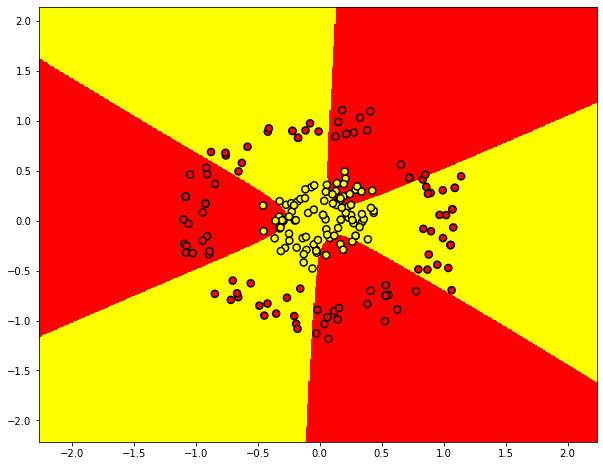

In [31]:
model = SVC(kernel='sigmoid')
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)


<ipython-input-32-9ab45a7989ee>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


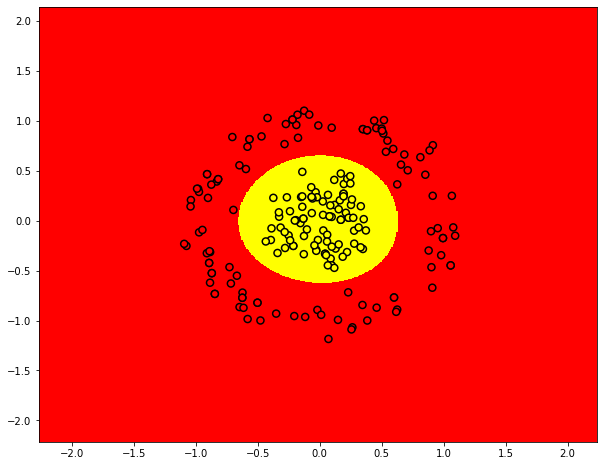

In [32]:
model = SVC(kernel='rbf')
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)
